In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# read the charts dataset
charts_df = pd.read_csv('spotify_daily_charts.csv')
charts_df.head()

,date,position,track_id,track_name,artist,streams
0,2018-01-01,1,0ofbQMrRDsUaVKq2mGLEAb,Havana,Camila Cabello,155633
1,2018-01-01,2,0tgVpDi06FyKpA1z0VMD4v,Perfect,Ed Sheeran,134756
2,2018-01-01,3,3hBBKuWJfxlIlnd9QFoC8k,What Lovers Do (feat. SZA),Maroon 5,130898
3,2018-01-01,4,1mXVgsBdtIVeCLJnSnmtdV,Too Good At Goodbyes,Sam Smith,130798
4,2018-01-01,5,2ekn2ttSfGqwhhate0LSR0,New Rules,Dua Lipa,125472


In [4]:
print(charts_df.shape)
print(200*len(charts_df['date'].unique()))
print(charts_df.dtypes)
print(charts_df.info())

(197800, 6)
197800
date          object
position       int64
track_id      object
track_name    object
artist        object
streams        int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197800 entries, 0 to 197799
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        197800 non-null  object
 1   position    197800 non-null  int64 
 2   track_id    197800 non-null  object
 3   track_name  197800 non-null  object
 4   artist      197800 non-null  object
 5   streams     197800 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 9.1+ MB
None


In [5]:
charts_df[charts_df['artist'].isnull()]

,date,position,track_id,track_name,artist,streams


In [6]:
sum(charts_df.duplicated())

0

In [7]:
charts_df['position'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [8]:
len(charts_df['artist'].unique())

605

In [9]:
len(charts_df['track_name'].unique())

1826

In [10]:
len(charts_df['track_id'].unique())

2292

In [11]:
#transform date column into a datetime column
charts_df['date'] = pd.to_datetime(charts_df['date'])
charts_df.head()

,date,position,track_id,track_name,artist,streams
0,2018-01-01,1,0ofbQMrRDsUaVKq2mGLEAb,Havana,Camila Cabello,155633
1,2018-01-01,2,0tgVpDi06FyKpA1z0VMD4v,Perfect,Ed Sheeran,134756
2,2018-01-01,3,3hBBKuWJfxlIlnd9QFoC8k,What Lovers Do (feat. SZA),Maroon 5,130898
3,2018-01-01,4,1mXVgsBdtIVeCLJnSnmtdV,Too Good At Goodbyes,Sam Smith,130798
4,2018-01-01,5,2ekn2ttSfGqwhhate0LSR0,New Rules,Dua Lipa,125472


In [12]:
#extract month 
charts_df['month']=charts_df['date'].dt.month
charts_df.head()

,date,position,track_id,track_name,artist,streams,month
0,2018-01-01,1,0ofbQMrRDsUaVKq2mGLEAb,Havana,Camila Cabello,155633,1
1,2018-01-01,2,0tgVpDi06FyKpA1z0VMD4v,Perfect,Ed Sheeran,134756,1
2,2018-01-01,3,3hBBKuWJfxlIlnd9QFoC8k,What Lovers Do (feat. SZA),Maroon 5,130898,1
3,2018-01-01,4,1mXVgsBdtIVeCLJnSnmtdV,Too Good At Goodbyes,Sam Smith,130798,1
4,2018-01-01,5,2ekn2ttSfGqwhhate0LSR0,New Rules,Dua Lipa,125472,1


In [13]:
#extract year
charts_df['year']=charts_df['date'].dt.year
# get day and day of week
charts_df['day']=charts_df['date'].dt.day
charts_df['day_of_week']=charts_df['date'].dt.dayofweek # The day of the week with Monday=0, Sunday=6.
charts_df.head()

,date,position,track_id,track_name,artist,streams,month,year,day,day_of_week
0,2018-01-01,1,0ofbQMrRDsUaVKq2mGLEAb,Havana,Camila Cabello,155633,1,2018,1,0
1,2018-01-01,2,0tgVpDi06FyKpA1z0VMD4v,Perfect,Ed Sheeran,134756,1,2018,1,0
2,2018-01-01,3,3hBBKuWJfxlIlnd9QFoC8k,What Lovers Do (feat. SZA),Maroon 5,130898,1,2018,1,0
3,2018-01-01,4,1mXVgsBdtIVeCLJnSnmtdV,Too Good At Goodbyes,Sam Smith,130798,1,2018,1,0
4,2018-01-01,5,2ekn2ttSfGqwhhate0LSR0,New Rules,Dua Lipa,125472,1,2018,1,0


In [14]:
charts_grouped = charts_df.groupby(['artist', 'year'])[['streams']].mean().sort_values('streams',ascending=False).reset_index()
charts_grouped

,artist,year,streams
0,juan karlos,2018,216977.368421
1,Skusta Clee,2019,209365.164474
2,Dan + Shay,2019,204598.033708
3,Juan Caoile,2020,193977.486957
4,Jawsh 685,2020,162623.094737
...,...,...,...
1043,Leanne & Naara,2020,18967.000000
1044,Loren Allred,2019,18308.000000
1045,Clean Bandit,2019,16101.000000
1046,Craig David,2018,15740.000000


In [15]:
charts_grouped[charts_grouped['artist'] == 'Ed Sheeran']

,artist,year,streams
141,Ed Sheeran,2019,60543.518196
321,Ed Sheeran,2018,40113.407725
331,Ed Sheeran,2020,39598.897281


## 2018

In [16]:
charts_2018_df = charts_df[charts_df['year'] == 2018]
charts_2018_df.head()

,date,position,track_id,track_name,artist,streams,month,year,day,day_of_week
0,2018-01-01,1,0ofbQMrRDsUaVKq2mGLEAb,Havana,Camila Cabello,155633,1,2018,1,0
1,2018-01-01,2,0tgVpDi06FyKpA1z0VMD4v,Perfect,Ed Sheeran,134756,1,2018,1,0
2,2018-01-01,3,3hBBKuWJfxlIlnd9QFoC8k,What Lovers Do (feat. SZA),Maroon 5,130898,1,2018,1,0
3,2018-01-01,4,1mXVgsBdtIVeCLJnSnmtdV,Too Good At Goodbyes,Sam Smith,130798,1,2018,1,0
4,2018-01-01,5,2ekn2ttSfGqwhhate0LSR0,New Rules,Dua Lipa,125472,1,2018,1,0


In [17]:
charts18_grouped = charts_2018_df.groupby(['artist'])[['streams']].sum().sort_values('streams',ascending=False)
charts18_grouped

,streams
artist,
LANY,156981779
Moira Dela Torre,136577563
Ben&Ben,94218624
Ed Sheeran,93464240
December Avenue,91350220
...,...
Nyoy Volante,19939
IU,19905
Christopher,19092


## 2019

In [18]:
charts_2019_df = charts_df[charts_df['year'] == 2019]
charts_2019_df.head()

,date,position,track_id,track_name,artist,streams,month,year,day,day_of_week
73000,2019-01-01,1,2rPE9A1vEgShuZxxzR2tZH,"thank u, next",Ariana Grande,194707,1,2019,1,1
73001,2019-01-01,2,5f9808hpiCpuNyqqdXmpF2,Buwan,juan karlos,194648,1,2019,1,1
73002,2019-01-01,3,2BgD4nRyx9EZ5o8YEnjRSV,Kung 'Di Rin Lang Ikaw,December Avenue,191715,1,2019,1,1
73003,2019-01-01,4,1X4l4i472kW5ofFP8Xo0x0,Sana,I Belong to the Zoo,182965,1,2019,1,1
73004,2019-01-01,5,5V2AX2WTOHl2FKtftvisV6,Kahit Ayaw Mo Na,This Band,177283,1,2019,1,1


In [19]:
charts19_grouped = charts_2019_df.groupby(['artist'])[['streams']].sum().sort_values('streams',ascending=False)
charts19_grouped

,streams
artist,
December Avenue,244858688
Ben&Ben,173152481
This Band,136359046
LANY,126914090
Ed Sheeran,118120404
...,...
David Guetta,23222
MAMAMOO,22382
Jax Jones,21679


## 2020

In [20]:
charts_2020_df = charts_df[charts_df['year'] == 2020]
charts_2020_df.head()

,date,position,track_id,track_name,artist,streams,month,year,day,day_of_week
146000,2020-01-01,1,4YMfE4r1JWADFw2Fn74XW2,Catriona,Matthaios,284532,1,2020,1,2
146001,2020-01-01,2,2b8fOow8UzyDFAE27YhOZM,Memories,Maroon 5,222136,1,2020,1,2
146002,2020-01-01,3,696DnlkuDOXcMAnKlTgXXK,ROXANNE,Arizona Zervas,204600,1,2020,1,2
146003,2020-01-01,4,65sEZZaxTjLMD8vNgPoMz5,Imahe,Magnus Haven,180899,1,2020,1,2
146004,2020-01-01,5,5l9g7py8RCblcvbZgGQgSd,Pagtingin,Ben&Ben,166835,1,2020,1,2


In [21]:
charts20_grouped = charts_2020_df.groupby(['artist'])[['streams']].sum().sort_values('streams',ascending=False)
charts20_grouped

,streams
artist,
Ben&Ben,224099112
Matthaios,87732266
Taylor Swift,77207550
Lauv,76081245
December Avenue,67074711
...,...
Casting Crowns,19929
Gary Valenciano,19648
Panic! At The Disco,19609


In [22]:
charts_combined = charts19_grouped.append(charts18_grouped)
charts_combined = charts_combined.append(charts20_grouped)

In [23]:
## Average streams per year

charts_mean = charts_combined.groupby(['artist'])[['streams']].mean().sort_values('streams', ascending=False).reset_index()
charts_mean = charts_mean[charts_mean['artist'] != 'BLACKPINK']
charts_mean = charts_mean[charts_mean['artist'] != 'BTS']
charts_mean

,artist,streams
0,Ben&Ben,1.638234e+08
1,December Avenue,1.344279e+08
2,LANY,1.105197e+08
3,Moira Dela Torre,9.496558e+07
4,Ed Sheeran,8.363545e+07
...,...,...
600,Nyoy Volante,1.993900e+04
601,Casting Crowns,1.992900e+04
602,Christopher,1.909200e+04
603,Craig David,1.574000e+04


## WITH INTERNATIONAL SINGERS

Text(0.5, 0, 'Streams')

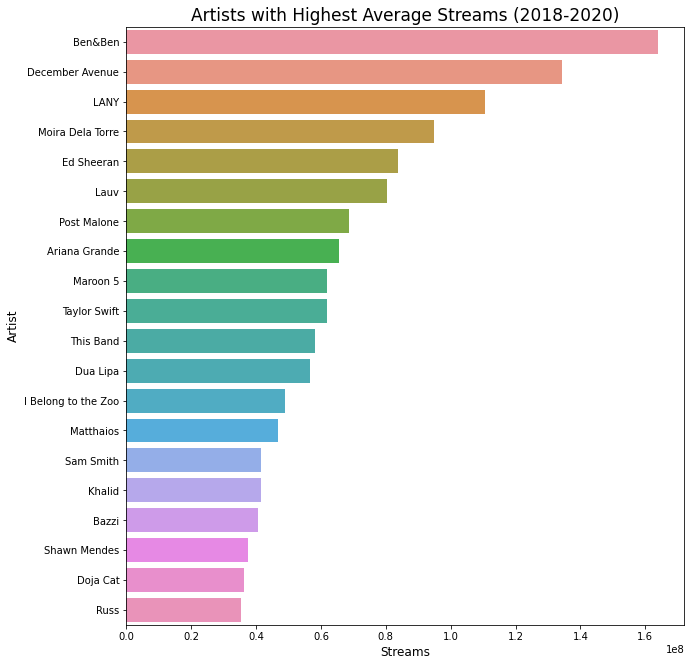

In [25]:
plt.figure(figsize=(10,11))
ax = sns.barplot(x="streams", y="artist", data=charts_mean.head(20))
plt.title('Artists with Highest Average Streams (2018-2020)', fontsize=17)
plt.ylabel('Artist', fontsize=12)
plt.xlabel('Streams', fontsize=12)


In [48]:
charts_mean_int = charts_mean[charts_mean['artist'] != 'This Band']
charts_mean_int = charts_mean_int[charts_mean_int['artist'] != 'I Belong to the Zoo']
charts_mean_int = charts_mean_int[charts_mean_int['artist'] != 'Matthaios']
charts_mean_int = charts_mean_int[charts_mean_int['artist'] != 'Moira Dela Torre']
charts_mean_int = charts_mean_int[charts_mean_int['artist'] != 'Ben&Ben']
charts_mean_int = charts_mean_int[charts_mean_int['artist'] != 'December Avenue']
charts_mean_int = charts_mean_int[charts_mean_int['artist'] != 'PDL']
charts_mean_int = charts_mean_int[charts_mean_int['artist'] != 'IV Of Spades']
charts_mean_int = charts_mean_int[charts_mean_int['artist'] != 'Emman']
charts_mean_int = charts_mean_int[charts_mean_int['artist'] != 'Silent Sanctuary']
charts_mean_int = charts_mean_int[charts_mean_int['artist'] != 'Magnus Haven']
charts_mean_int = charts_mean_int[charts_mean_int['artist'] != 'juan karlos']
charts_mean_int = charts_mean_int[charts_mean_int['artist'] != 'Hale']
charts_mean_int = charts_mean_int[charts_mean_int['artist'] != 'ALLMO$T']
charts_mean_int.head(20)

,artist,streams
2,LANY,1.105197e+08
4,Ed Sheeran,8.363545e+07
5,Lauv,8.036902e+07
6,Post Malone,6.879277e+07
7,Ariana Grande,6.554487e+07
8,Maroon 5,6.201606e+07
9,Taylor Swift,6.184322e+07
11,Dua Lipa,5.661649e+07
15,Sam Smith,4.143786e+07
16,Khalid,4.136713e+07


,artist,streams


Text(0.5, 0, 'Streams')

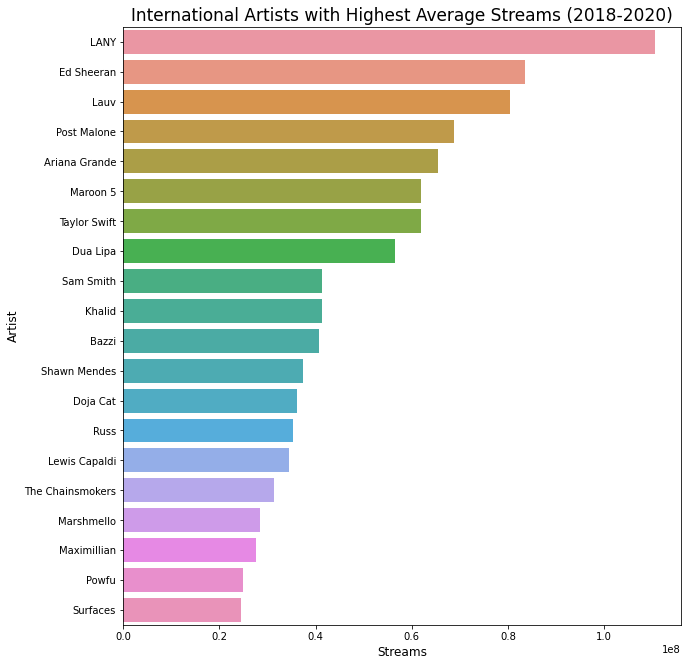

In [49]:
plt.figure(figsize=(10,11))
ax = sns.barplot(x="streams", y="artist", data=charts_mean_int.head(20))
plt.title('International Artists with Highest Average Streams (2018-2020)', fontsize=17)
plt.ylabel('Artist', fontsize=12)
plt.xlabel('Streams', fontsize=12)

In [50]:
artist_df = pd.read_csv('spotify_daily_charts_artists.csv')
artist_df.head()

,artist_id,artist_name,total_followers,genres,popularity
0,4nDoRrQiYLoBzwC5BhVJzF,Camila Cabello,18078605,"['dance pop', 'pop', 'post-teen pop']",87
1,6eUKZXaKkcviH0Ku9w2n3V,Ed Sheeran,69753264,"['pop', 'uk pop']",93
2,04gDigrS5kc9YWfZHwBETP,Maroon 5,26892218,"['pop', 'pop rock']",90
3,2wY79sveU1sp5g7SokKOiI,Sam Smith,13815441,"['pop', 'post-teen pop', 'uk pop']",89
4,6M2wZ9GZgrQXHCFfjv46we,Dua Lipa,19536508,"['dance pop', 'pop', 'uk pop']",93


In [67]:
artist_merged = pd.merge(charts_mean_int, artist_df, left_on='artist', right_on='artist_name')
artist_merged.head()

,artist,streams,artist_id,artist_name,total_followers,genres,popularity
0,LANY,1.105197e+08,49tQo2QULno7gxHutgccqF,LANY,2816148,"['la pop', 'pop']",80
1,Ed Sheeran,8.363545e+07,6eUKZXaKkcviH0Ku9w2n3V,Ed Sheeran,69753264,"['pop', 'uk pop']",93
2,Lauv,8.036902e+07,5JZ7CnR6gTvEMKX4g70Amv,Lauv,3393728,"['pop', 'post-teen pop']",87
3,Post Malone,6.879277e+07,246dkjvS1zLTtiykXe5h60,Post Malone,28234721,"['dfw rap', 'melodic rap', 'rap']",94
4,Ariana Grande,6.554487e+07,66CXWjxzNUsdJxJ2JdwvnR,Ariana Grande,50591568,"['dance pop', 'pop', 'post-teen pop']",94


In [81]:
artist_merged_final = artist_merged.sort_values('streams', ascending=False)
artist_merged_final.head(20)

,artist,streams,artist_id,artist_name,total_followers,genres,popularity
0,LANY,1.105197e+08,49tQo2QULno7gxHutgccqF,LANY,2816148,"['la pop', 'pop']",80
1,Ed Sheeran,8.363545e+07,6eUKZXaKkcviH0Ku9w2n3V,Ed Sheeran,69753264,"['pop', 'uk pop']",93
2,Lauv,8.036902e+07,5JZ7CnR6gTvEMKX4g70Amv,Lauv,3393728,"['pop', 'post-teen pop']",87
3,Post Malone,6.879277e+07,246dkjvS1zLTtiykXe5h60,Post Malone,28234721,"['dfw rap', 'melodic rap', 'rap']",94
4,Ariana Grande,6.554487e+07,66CXWjxzNUsdJxJ2JdwvnR,Ariana Grande,50591568,"['dance pop', 'pop', 'post-teen pop']",94
5,Maroon 5,6.201606e+07,04gDigrS5kc9YWfZHwBETP,Maroon 5,26892218,"['pop', 'pop rock']",90
6,Taylor Swift,6.184322e+07,06HL4z0CvFAxyc27GXpf02,Taylor Swift,32375852,"['dance pop', 'pop']",97
7,Dua Lipa,5.661649e+07,6M2wZ9GZgrQXHCFfjv46we,Dua Lipa,19536508,"['dance pop', 'pop', 'uk pop']",93
8,Sam Smith,4.143786e+07,2wY79sveU1sp5g7SokKOiI,Sam Smith,13815441,"['pop', 'post-teen pop', 'uk pop']",89
9,Khalid,4.136713e+07,6LuN9FCkKOj5PcnpouEgny,Khalid,12515504,"['alternative r&b', 'pop']",93


Text(0.5, 0, 'Number of Followers')

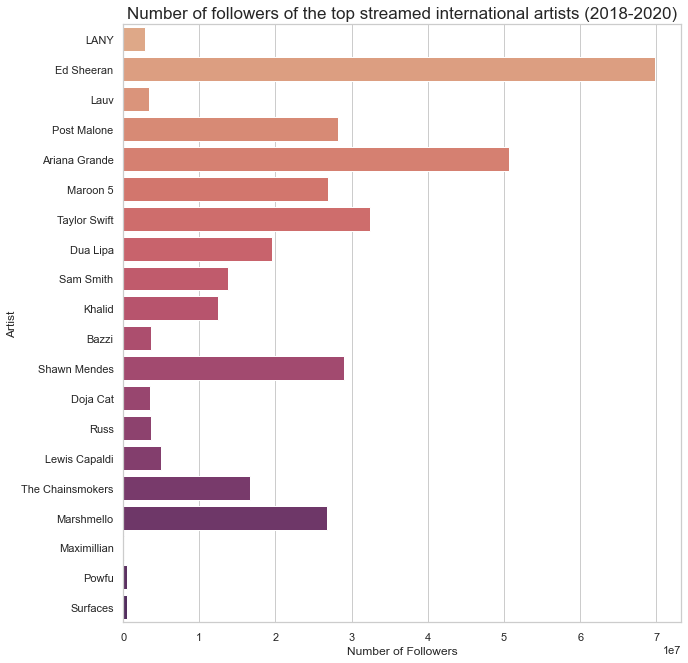

In [83]:
plt.figure(figsize=(10,11))
ax = sns.barplot(x='total_followers', y="artist_name", data=artist_merged_final.head(20), palette='flare')
plt.title('Number of followers of the top streamed international artists (2018-2020)', fontsize=17)
plt.ylabel('Artist', fontsize=12)
plt.xlabel('Number of Followers', fontsize=12)

Text(0.5, 0, 'Number of Followers')

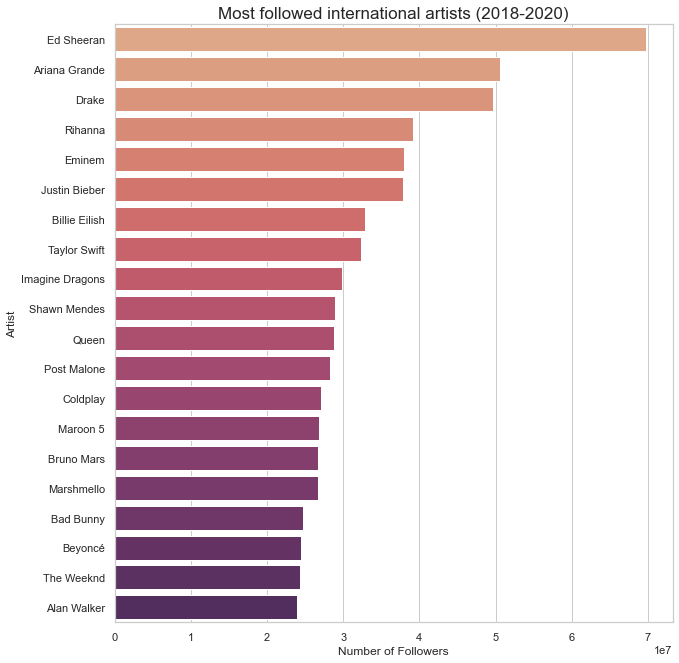

In [85]:
artist_followers = artist_merged.sort_values('total_followers', ascending=False)
plt.figure(figsize=(10,11))
ax = sns.barplot(x='total_followers', y="artist_name", data=artist_followers.head(20), palette='flare')
plt.title('Most followed international artists (2018-2020)', fontsize=17)
plt.ylabel('Artist', fontsize=12)
plt.xlabel('Number of Followers', fontsize=12)

In [108]:
top_pop_artists = charts_mean[charts_mean['artist'] == 'Sigma']
top_pop_artists = top_pop_artists.append(charts_mean[charts_mean['artist'] == 'Lady Gaga'])
top_pop_artists = top_pop_artists.append(charts_mean[charts_mean['artist'] == 'Flo Rida'])
top_pop_artists = top_pop_artists.append(charts_mean[charts_mean['artist'] == 'Nevada'])
top_pop_artists = top_pop_artists.append(charts_mean[charts_mean['artist'] == 'Camila Cabello'])
top_pop_artists.sort_values('streams', ascending=False)

,artist,streams
48,Camila Cabello,2.119954e+07
85,Lady Gaga,1.504029e+07
574,Sigma,2.784400e+04


Text(0.5, 0, 'Artist')

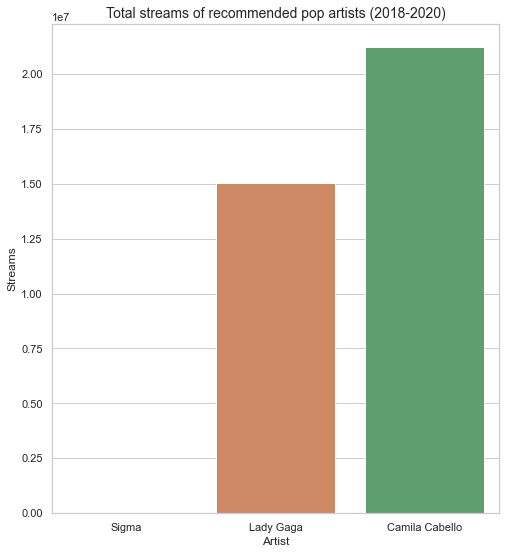

In [143]:
plt.figure(figsize=(8,9))


ax = sns.barplot(x="artist", y="streams", data=top_pop_artists)
plt.title('Total streams of recommended pop artists (2018-2020)', fontsize=14)
plt.ylabel('Streams', fontsize=12)
plt.xlabel('Artist', fontsize=12)




In [130]:
top_rnb_artists = charts_mean[charts_mean['artist'] == 'Drake']
top_rnb_artists = top_rnb_artists.append(charts_mean[charts_mean['artist'] == 'Charlie Puth'])
top_rnb_artists = top_rnb_artists.append(charts_mean[charts_mean['artist'] == "Why Don't We"])
top_rnb_artists = top_rnb_artists.append(charts_mean[charts_mean['artist'] == 'Kygo'])
top_rnb_artists = top_rnb_artists.append(charts_mean[charts_mean['artist'] == 'David Guetta'])
top_rnb_artists.sort_values('streams', ascending=False)

,artist,streams
49,Drake,2.118510e+07
102,Why Don't We,1.239367e+07
132,Charlie Puth,8.973467e+06
139,David Guetta,8.504342e+06
142,Kygo,8.316711e+06


Text(0.5, 0, 'Artist')

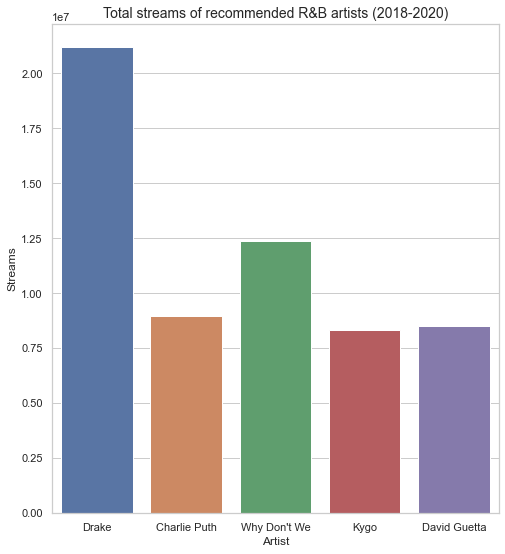

In [144]:
plt.figure(figsize=(8,9))


ax = sns.barplot(x="artist", y="streams", data=top_rnb_artists)
plt.title('Total streams of recommended R&B artists (2018-2020)', fontsize=14)
plt.ylabel('Streams', fontsize=12)
plt.xlabel('Artist', fontsize=12)


In [135]:
top_rap_artists = charts_mean[charts_mean['artist'] == 'Lost Kings']
top_rap_artists = top_rap_artists.append(charts_mean[charts_mean['artist'] == 'Charlie Puth'])
top_rap_artists = top_rap_artists.append(charts_mean[charts_mean['artist'] == "Lil Nas X"])
top_rap_artists = top_rap_artists.append(charts_mean[charts_mean['artist'] == 'Tyga'])
top_rap_artists = top_rap_artists.append(charts_mean[charts_mean['artist'] == 'Demi Lovato'])
top_rap_artists.sort_values('streams', ascending=False)

,artist,streams
94,Lil Nas X,13254878.5
132,Charlie Puth,8973467.0
198,Tyga,4717460.0
218,Demi Lovato,3596192.5
477,Lost Kings,166296.0


Text(0.5, 0, 'Artist')

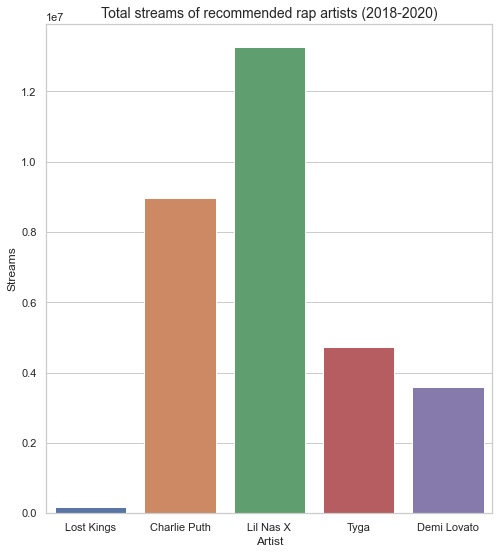

In [146]:
plt.figure(figsize=(8,9))


ax = sns.barplot(x="artist", y="streams", data=top_rap_artists)
plt.title('Total streams of recommended rap artists (2018-2020)', fontsize=14)
plt.ylabel('Streams', fontsize=12)
plt.xlabel('Artist', fontsize=12)
